<a href="https://colab.research.google.com/github/anastasiia-vsk/ML_course/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
data = pd.read_csv('drive/MyDrive/ML course/data/medical-charges.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Можна використовувати фіксовані значення для основних змінних. Наприклад:
Базова ціна + надбавка за smoker + збільшення відповідно до bmi + збільшення по віку і тд.

2. Розрахувати мінімальну вартість, максимальну та середню ціну для кожної категорії осіб по регіонам і порівняти із ринковими. Прорахувати додатково чи при мінімальній вартості страховки ми будемо працювати у плюс)

3. Визначити, яка зі змінних найбільше впливає на коливання ціни і при формуванні цін відштовхуватися від неї.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
fig = px.histogram(
    data,
    x='charges',
    color='sex',
    marginal='box',
    title='Distribution of Charges by Sex',
    nbins=50,
    color_discrete_sequence=['blue', 'red'])

fig.update_layout(bargap=0.1)
fig.show()

## Спостереження:
- Найбільша кількість спостережень зосереджена на проміжку charges 2 000-14 000.
- Медіана по charges знаходиться приблизно на одному рівні для чоловіків та жінок, в той час як у вищих діапазонах витрат (понад 20,000) частка чоловіків є більшою, ніж жінок.
- Загалом витрати серед жінок є менш варіативними.
- Чоловіки мають більший розмах витрат, включаючи значні викиди у діапазоні понад 40,000.




In [6]:
fig = px.histogram(
    data,
    x='charges',
    color='region',
    marginal='box',
    title='Distribution of Charges by Region',
    nbins=10,
    color_discrete_sequence=['blue', 'red', 'orange', 'green']
)

fig.update_layout(
    bargap=0.2,
    barmode='group'  # Для відображення гістограм поруч
)

fig.show()

## Спостереження:
- Найбільше спостережень у всіх регіонах припадає на діапазон charges до 10К. На другому місці діапазон 10К-20К.
- Регіон southeast має більше значень у вищих діапазонах витрат (40К-50К), ніж інші регіони.
- Медіана charges у регіоні northeast дещо вища, ніж в інших регіонах.
- Регіон southeast демонструє ширший розмах charges.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [7]:
fig_region = px.histogram(
    data,
    x='region',
    color='smoker',
    title='Distribution of Region by Smoking Status',
    barmode='group',
    color_discrete_sequence=['blue', 'red']
)

fig_region.update_layout(
    bargap=0.1
)

##Спостереження:
- У всіх регіонах кількість людей, які не курять, значно перевищує кількість курців.
- Регіон `southeast` має трохи більшу долю курців у порівнянні з іншими регіонами.
- Значної кореляції не спостерігаю на даному етапі.

In [8]:
fig_region = px.histogram(
    data,
    x='children',
    color='smoker',
    title='Distribution of Children Count by Smoking Status',
    barmode='group',
    color_discrete_sequence=['blue', 'red']
)

fig_region.update_layout(
    bargap=0.1
)

## Спостереження:
- Найбільше маємо записів про людей, що не мають дітей і далі з кожною наступною дитиною група стає менше.
- Обрахувавши долю курців для кожної групи, де є достатньо даних, не можу сказати, що кількість дітей корелює із тим чи людина курець.
  - 0 - 25%
  - 1 - 19%
  - 2 - 23%
  - 3 - 25%


**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
# відсортувала для легенди
category_order = sorted(data['children'].unique())

fig = px.violin(
    data,
    y='charges',
    x='children',
    title='Distribution of Charges by Number of Children',
    color='children',
    category_orders={'children': category_order}
)

fig.update_layout(
    yaxis_title='Charges',
    xaxis_title='Number of Children',
)

fig.show()

## Cпостереження:
- Люди без дітей мають найбільш широкий діапазон charges, максимальні значення наближаються до 70К, в той час як люди з 5 дітьми значно менше - до 20К. *Але як ми дізналися з попередньої візуалізації, записів про людей з 5 дітьми у нас більш ніж у 30 разів менше, тому такий нерівномірний розподіл може дещо спотворювати висновки.*
- 1-3 дітей:
  - розподіл стає більш симетричним і дещо звужується
  - середні витрати залишаються схожими на категорію з 0 дітей
- Медіана для 1 та 5 дітей на одному рівні ~8500, найбільша медіана у людей з 4 дітьми, за ними 3, 0 та 2.

Якщо враховувати ті групи, де достатньо даних (0-3), то не можу, сказати що **кількість** дітей впливає на структуру charges. А ось просто їх наявність - скоріше так.




**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [10]:
non_smoker_df = data[data.smoker == 'no']

In [11]:
def estimate_charges(age, w, b):
    return w * age + b

In [12]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

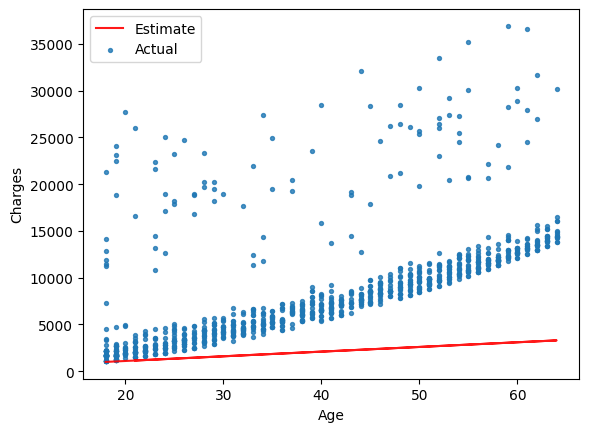

In [13]:
try_parameters(non_smoker_df, 50, 100)

Лінія занадто низько, малий кут нахилу

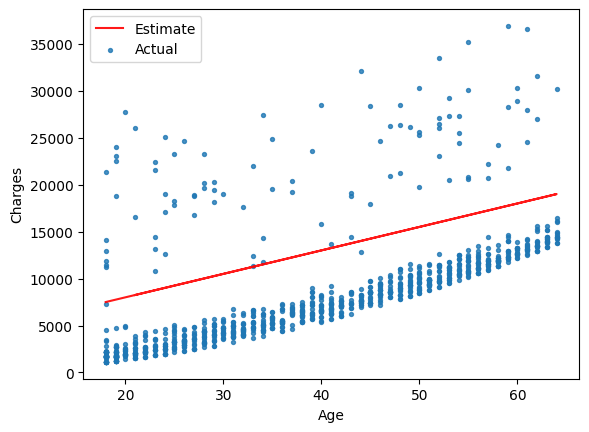

In [14]:
try_parameters(non_smoker_df, 250, 3000)

Кут нахилу і висота схожі до очікуваного, але без оцінки математично складно сказати чи це хороший варіант.

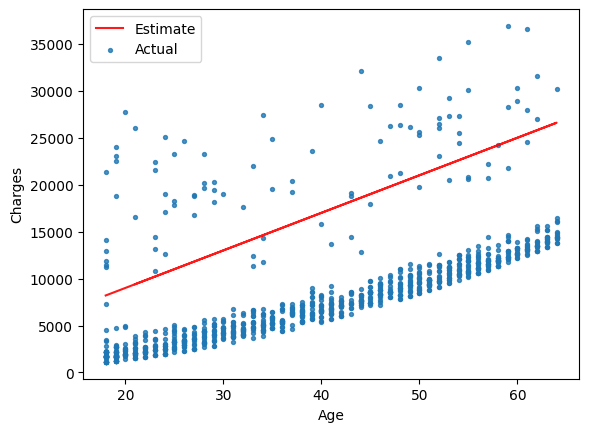

In [15]:
try_parameters(non_smoker_df, 400, 1000)

Кут і висота лінії скоріше "прогнозує" викиди

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [16]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [17]:
def try_parameters_new(data, w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


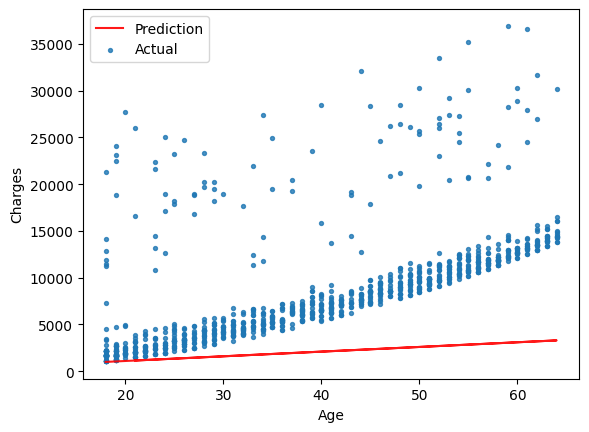

In [18]:
try_parameters_new(non_smoker_df, 50, 100)

RMSE Loss:  6423.725190986682


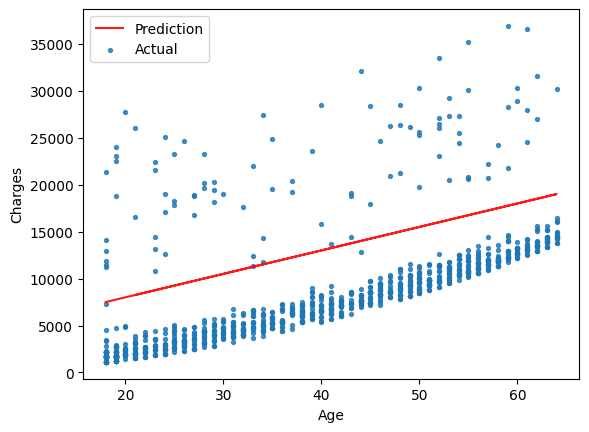

In [19]:
try_parameters_new(non_smoker_df, 250, 3000)

RMSE Loss:  9718.601840724683


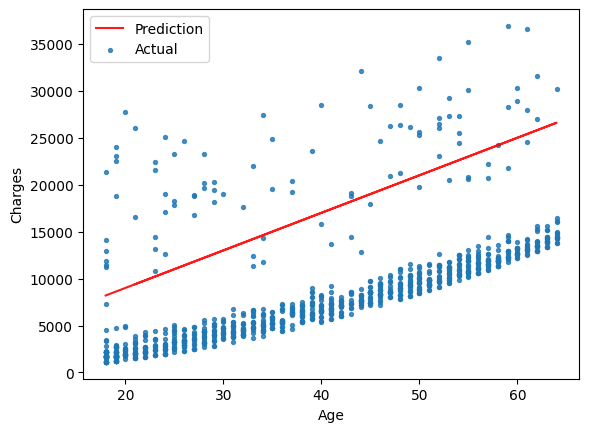

In [20]:
try_parameters_new(non_smoker_df, 400, 1000)

Найліпші параметри:

RMSE Loss:  4949.05903842752


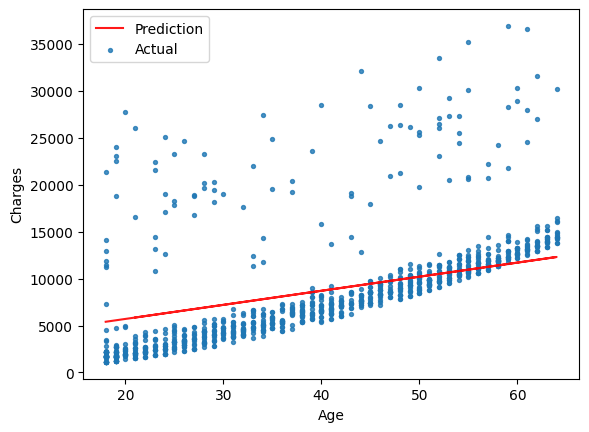

In [21]:
try_parameters_new(non_smoker_df, 150, 2700)

Яке найнижче значення втрат ви зможете досягти?

**RMSE Loss:  4949.05903842752**

Чи можете ви придумати загальну стратегію для знаходження кращих значень  𝑤  та  𝑏  методом проб та помилок?

- Починати з найменшого і поступово збільшувати параметри w, b